# What we've done so far:
- installed anaconda and Jupyter.
- created and install jupyter kernels for FastAI, GWpy and PyCBC
- built our first model to classify kittens and puppies
- created our first dataset with GW signals.

# We are ready to build our first GW classifier

<img src="./figs/Lista10.gif" style="width: 650px;" align="center"/>

# What is a neural network?

<img src="./figs/tikz1.png" style="width: 600px;" align="center"/>

<font size="3"> What about the perceptrons in the second layer? 

<font size="3"> Each of those perceptrons is making a decision by weighing up the results from the prevoous layer.

- <font size="5"> $output = \begin{matrix}
 0 & \mathrm{if} ~ \sum_{j} w_{j}x_{j} \leq ~ \mathrm{threshold} \\
1 & \mathrm{if} ~ \sum_{j} w_{j}x_{j} > ~ \mathrm{threshold}
\end{matrix} ~ \rightarrow ~ \begin{matrix}
 0 & \mathrm{if} ~ w_{j}. x_{j} + b \leq 0 \\
1 & \mathrm{if} ~ w_{j}. x_{j} + b > 0
\end{matrix}$ 

<font size="5"> We can think the weights $(w_{j})$ and bias $(b)$ as dials and knobs, depend on how we adjust them our NN can perform good or not.

# We live in 2020 (although things are not going so great, but I digress), we should use "modern" tools, right?. 

# What is a Convolutional Neural Network (CNN) ?

<table><tr>
    <td><img src='./figs/CNN.png' style="width: 600px;"></td> 
    <td><img src='./figs/Convolution_arithmetic.gif' style="width: 400px;"></td>
</tr></table>

<font size="5"> CNNs are regularized versions of multilayer perceptrons.
    
<font size="5"> Convolutional networks were inspired by biological processes in a sense of connectivity pattern between neurons resembles the organization of the  visual cortex.

# First define what we are going to do and the data we are going to work:
- classify if a given input belongs to a signal or a background class, i.e. classification task.
- our dataset consist of q-graph images 512 $\times$ 512 pixels RGB.

# Lets beging with import the needed libraries for this task. The FastAI has a set of function which can properly deal with images and CV problems, lets import it

In [1]:
from fastai.vision.all import *

## To build our model is simple as play with lego:

<img src="./figs/NN_pipeline.png" style="width: 650px;" align="center"/> 
<figcaption> source: https://deepmind.com/learning-resources/deep-learning-lecture-series-2020 </figcaption>

## We can list what are the main "lego" pieces we need to build our classifier:
- a way to load, normalize, split into train and validation data.
- a way to evaluate how close to the reality the predictions from our CNN can be.

### While the first is pretty straightforward, we need to give the data to our model so it can "learn". The later seems to have a more important role. However, we will soon see that both are intimately related and will help us to find the best way to turn the "knobs" and adjust the "dials" of our CNN.

<font size="5"> We need a way to quantify how well our CNN perform and use this information to train and improve it.
- <font size="3">What we'd like is an algorithm which lets us find weights and biases so that the output from the network approximates to the ground truth for all training inputs $x$. 
- <font size="3">To quantify how well we're achieving this goal we can define a cost function

<font size="5"> $C(w,b) \equiv \frac{1}{2n} \sum_{x} \parallel y(x) - \mathrm{CNN}_{\mathrm{pred}}\parallel^{2}$
    
- <font size="3">$y(x)$ is the ground truth for a given sample $x$
- <font size="3">often called Loss, objective or criterion.

<font size="5"> We want to find the weights and biases which minimize our cost function $C(w,b)$.
<table><tr>
    <td><img src="./figs/valley_with_ball.png" style="width: 550px;"></td> 
    <td><img src="./figs/DROP_Deep_Learning.gif" style="width: 550px;">
    <figcaption> source: losslandscape.com </figcaption></td>
    </tr></table>
    
<font size="5">This as a really easy task for a function few parameters. 
    
<font size="5">In the reality we want to find the weights and biases of NN which can easily have thousands or even millions of parameters.

<img src="./figs/9euoe42zwj641.jpg" style="width: 650px;" align="center"/> 

<font size="5"> The idea is to use gradient descent to find the weights $w_{k}$ and biases $b_{l}$ which minimize the cost we define before.

<font size="5">\begin{eqnarray}
  w_k & \rightarrow & w_k' = w_k-\eta \frac{\partial C}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\eta \frac{\partial C}{\partial b_l}.
\end{eqnarray}

<font size="5"> Notice that this cost function has the form:

<font size="5"> $C(w,b) \equiv \frac{1}{2n} \sum_{x} \parallel y(x) - \mathrm{NN}_{\mathrm{pred}}\parallel^{2}$

<font size="5"> it's an average over costs

<font size="5"> $C_x \equiv \frac{\|y(x)-\mathrm{NN}_{\mathrm{pred}}(x)\|^2}{2}$

<font size="5"> In practice, to compute the gradient $\nabla C$ we need first to compute the gradients $\nabla C_x$ separately for each training input $x$, and then average all.

<img src="./figs/sweet_luct.gif" style="width: 550px;" align="center"/> 

<font size="5"> An idea called stochastic gradient descent can be used to speed up learning.

<font size="5"> Stochastic gradient descent works by randomly picking out a small number m of randomly chosen training inputs.

<font size="5"> We'll label those random training inputs $X_1, X_2, \ldots, X_m$ and refer to them as a mini-batch.

<font size="5"> Provided the sample size m is large enough we expect that the average value of the $\nabla C_{X_j}$ will be roughly equal to the average over all $\nabla C_{X}$

<font size="5">\begin{eqnarray}
  \frac{\sum_{j=1}^m \nabla C_{X_{j}}}{m} \approx \frac{\sum_x \nabla C_x}{n} = \nabla C,
\end{eqnarray}

### The stochastic gradient descent works by picking out a randomly chosen mini-batch of training inputs, and training with those,


<font size="5">\begin{eqnarray} 
  w_k & \rightarrow & w_k' = w_k-\frac{\eta}{n}
  \sum_j \frac{\partial C_{X_j}}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\frac{\eta}{n}
  \sum_j \frac{\partial C_{X_j}}{\partial b_l},
\end{eqnarray}

## Now we know from where we will beging, lets start with the data and how load it into our model:

In [2]:
ImageDataLoaders?

Init signature: ImageDataLoaders(*loaders, path='.', device=None)
Docstring:      Basic wrapper around several `DataLoader`s with factory methods for computer vision problems
File:           ~/anaconda3/envs/fastai_v2/lib/python3.7/site-packages/fastai/vision/data.py
Type:           type
Subclasses:     


In [3]:
path = Path('./data for classification/')

In [4]:
path.ls()

(#3) [Path('data for classification/bg'),Path('data for classification/sig'),Path('data for classification/models')]

In [5]:
data = ImageDataLoaders.from_folder(path,valid_pct=.2)

### The ImageDataLoaders has a very convinient function to check the data, called show_batch

In [6]:
data.show_batch?

Signature:
data.show_batch(
    b=None,
    max_n=9,
    ctxs=None,
    show=True,
    unique=False,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/anaconda3/envs/fastai_v2/lib/python3.7/site-packages/fastai/data/core.py
Type:      method


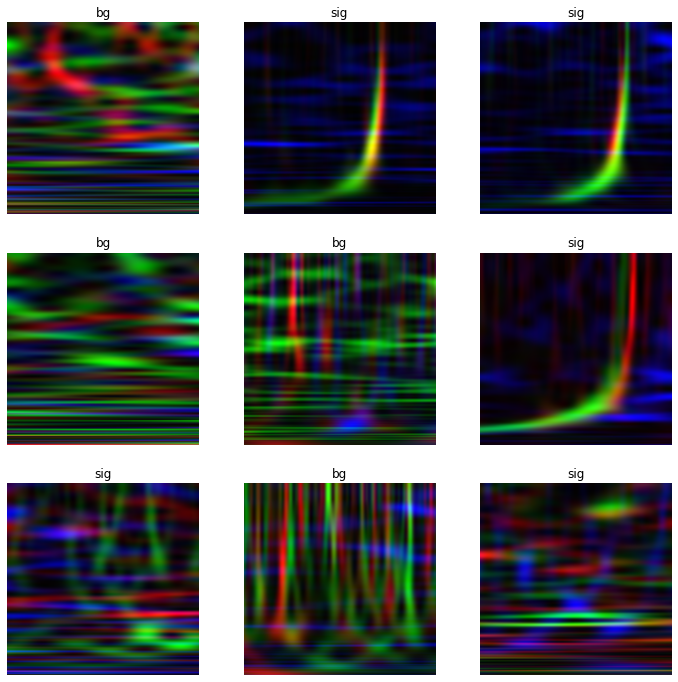

In [7]:
data.show_batch(figsize=(12,12))

### We can also check the classes and names each one has:

In [8]:
data.vocab

(#2) ['bg','sig']

In [9]:
data.c

2

# lets check one batch:

In [10]:
b = data.one_batch()

In [11]:
len(b)

2

In [12]:
b[0].shape

torch.Size([64, 3, 512, 512])

### in one batch we have:
- 64 images
- 3 color channel
- 512 $\times$ 512 pixels

### this dataset might not fit into my GPU memory, so we can desroy it and cread a smaller one

<img src="./figs/GPU_cat.png" style="width: 550px;" align="center"/> 

In [13]:
del(data)

In [14]:
import gc
gc.collect()

42161

In [15]:
torch.cuda.empty_cache()

### Now we are going to pass an new parameter called item_tfms to resize our images:

In [16]:
data = ImageDataLoaders.from_folder(path, valid_pct=.2, item_tfms=Resize(128))

### check one batch:

In [17]:
b = data.one_batch()

In [18]:
b[0][0].shape

torch.Size([3, 128, 128])

In [19]:
data.train_ds

(#7848) [(PILImage mode=RGB size=512x512, TensorCategory(1)),(PILImage mode=RGB size=512x512, TensorCategory(1)),(PILImage mode=RGB size=512x512, TensorCategory(0)),(PILImage mode=RGB size=512x512, TensorCategory(0)),(PILImage mode=RGB size=512x512, TensorCategory(1)),(PILImage mode=RGB size=512x512, TensorCategory(1)),(PILImage mode=RGB size=512x512, TensorCategory(1)),(PILImage mode=RGB size=512x512, TensorCategory(0)),(PILImage mode=RGB size=512x512, TensorCategory(1)),(PILImage mode=RGB size=512x512, TensorCategory(1))...]

<AxesSubplot:>

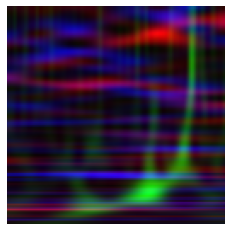

In [20]:
show_image(b[0][10])

In [21]:
data.encodes

(#2) [(#2) [(object,object) -> noop,(bytes,object) -> create
(ndarray,object) -> create
(Tensor,object) -> create
(str,object) -> create
(Path,object) -> create],(#2) [(object,object) -> parent_label,(object,object) -> encodes
]]

In [22]:
data.after_item

Pipeline: Resize -- {'size': (128, 128), 'method': 'crop', 'pad_mode': 'reflection'} -> ToTensor

# We can also check what is going on with the batches:

In [23]:
data.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}

### lets test another normalization scheme

In [24]:
del(data);
gc.collect();
torch.cuda.empty_cache()

### Again, FastAI has a very convenient form to handle data normalization. We can pass any kind of normalization scheme using the Normalize class:

In [25]:
Normalize??

Init signature: Normalize(self, mean=None, std=None, axes=(0, 2, 3))
Source:        
class Normalize(DisplayedTransform):
    "Normalize/denorm batch of `TensorImage`"
    parameters,order,store_attrs=L('mean', 'std'),99, 'mean,std,axes'
    def __init__(self, mean=None, std=None, axes=(0,2,3)):
        self.mean,self.std,self.axes = mean,std,axes

    @classmethod
    def from_stats(cls, mean, std, dim=1, ndim=4, cuda=True): return cls(*broadcast_vec(dim, ndim, mean, std, cuda=cuda))

    def setups(self, dl:DataLoader):
        if self.mean is None or self.std is None:
            x,*_ = dl.one_batch()
            self.mean,self.std = x.mean(self.axes, keepdim=True),x.std(self.axes, keepdim=True)+1e-7

    def encodes(self, x:TensorImage): return (x-self.mean) / self.std
    def decodes(self, x:TensorImage):
        f = to_cpu if x.device.type=='cpu' else noop
        return (x*f(self.std) + f(self.mean))

    _docs=dict(encodes="Normalize batch", decodes="Denormalize batch")
File:  

### We can test the normalization scheme from the image_net dataset:

In [26]:
imagenet_stats??

Type:        tuple
String form: ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
Length:      2
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.


In [27]:
data = ImageDataLoaders.from_folder(path, valid_pct=.2, item_tfms=Resize(128), batch_tfms=[Normalize.from_stats(*imagenet_stats)])

In [28]:
b = data.one_batch()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

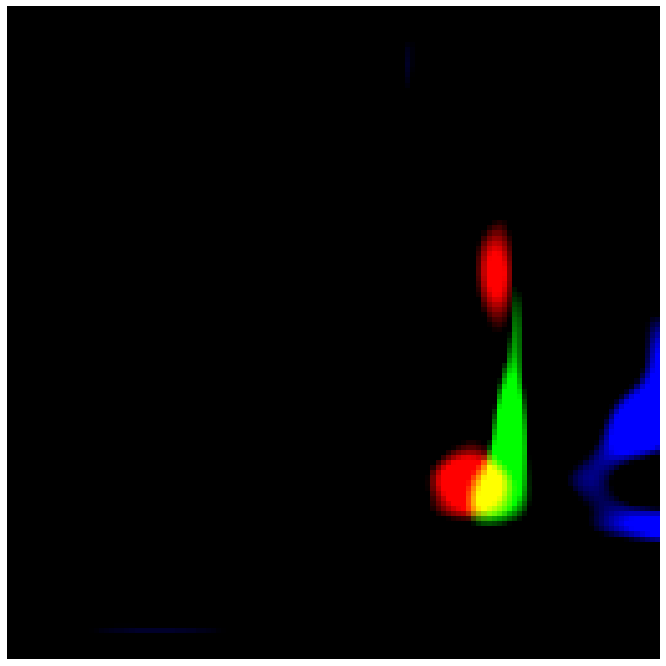

In [31]:
_, axs = subplots(figsize=(12,12))
show_image(b[0][0],ax=axs[0])

In [32]:
b[0][0]

tensor([[[-1.9638, -2.0152, -2.0323,  ..., -1.9124, -1.9467, -1.9124],
         [-1.9638, -2.0152, -2.0323,  ..., -1.9124, -1.9467, -1.9124],
         [-1.9638, -2.0152, -2.0323,  ..., -1.9124, -1.9467, -1.9124],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -2.0323, -2.0323, -2.0323],
         [-1.7240, -1.7240, -1.7240,  ..., -1.9980, -1.9980, -1.9980],
         [-1.5185, -1.5185, -1.5185,  ..., -1.9467, -1.9467, -1.9467]],

        [[-1.7906, -1.8256, -1.7556,  ..., -1.7381, -1.6506, -1.6155],
         [-1.7906, -1.8256, -1.7556,  ..., -1.7381, -1.6506, -1.6155],
         [-1.7906, -1.8256, -1.7556,  ..., -1.7381, -1.6506, -1.6155],
         ...,
         [-1.4755, -1.4755, -1.4755,  ..., -1.9307, -1.9482, -1.9482],
         [-1.7206, -1.7031, -1.7031,  ..., -1.8957, -1.9132, -1.9132],
         [-1.7906, -1.7906, -1.7906,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6650, -1.6476, -1.6127,  ..., -1.7696, -1.6999, -1.5953],
         [-1.6650, -1.6476, -1.6127,  ..., -1

In [33]:
data.before_batch

Pipeline: 

In [34]:
data.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

In [35]:
data.after_item

Pipeline: Resize -- {'size': (128, 128), 'method': 'crop', 'pad_mode': 'reflection'} -> ToTensor

# Data augmentation in computer vision

To the enhancement of a scarce or incomplete dataset for the purpose of machine learning.

In [36]:
img = PILImage(PILImage.create('figs/IMG_20200802_101509.jpg').resize((600,400)))

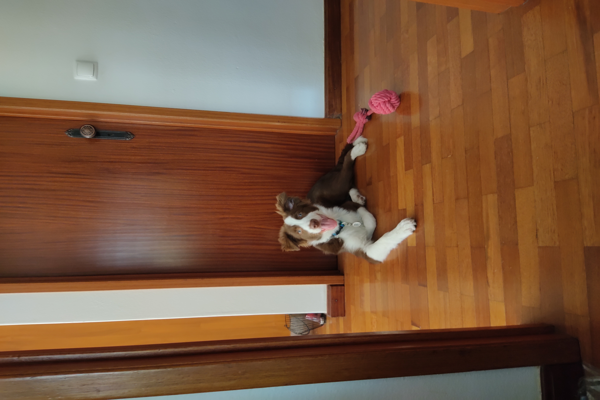

In [37]:
img

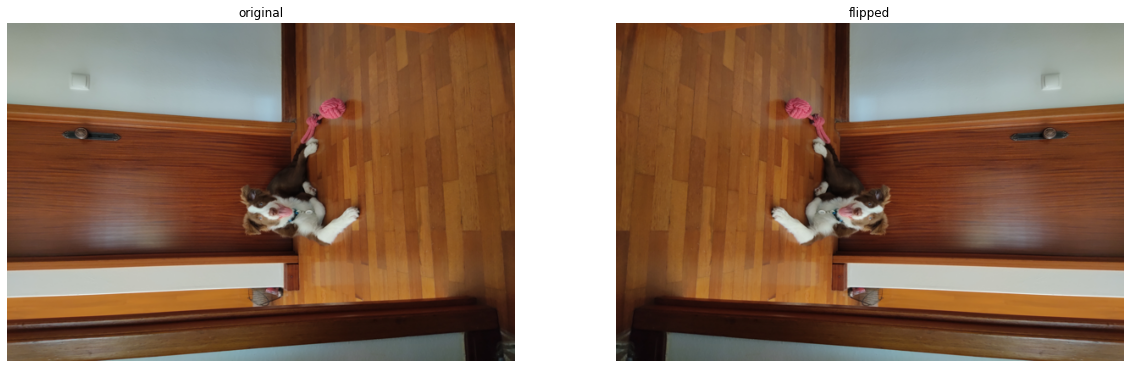

In [38]:
_,axs = subplots(1,2, figsize=(20,8))
show_image(img, ctx=axs[0], title='original')
show_image(img.flip_lr(), ctx=axs[1], title='flipped');

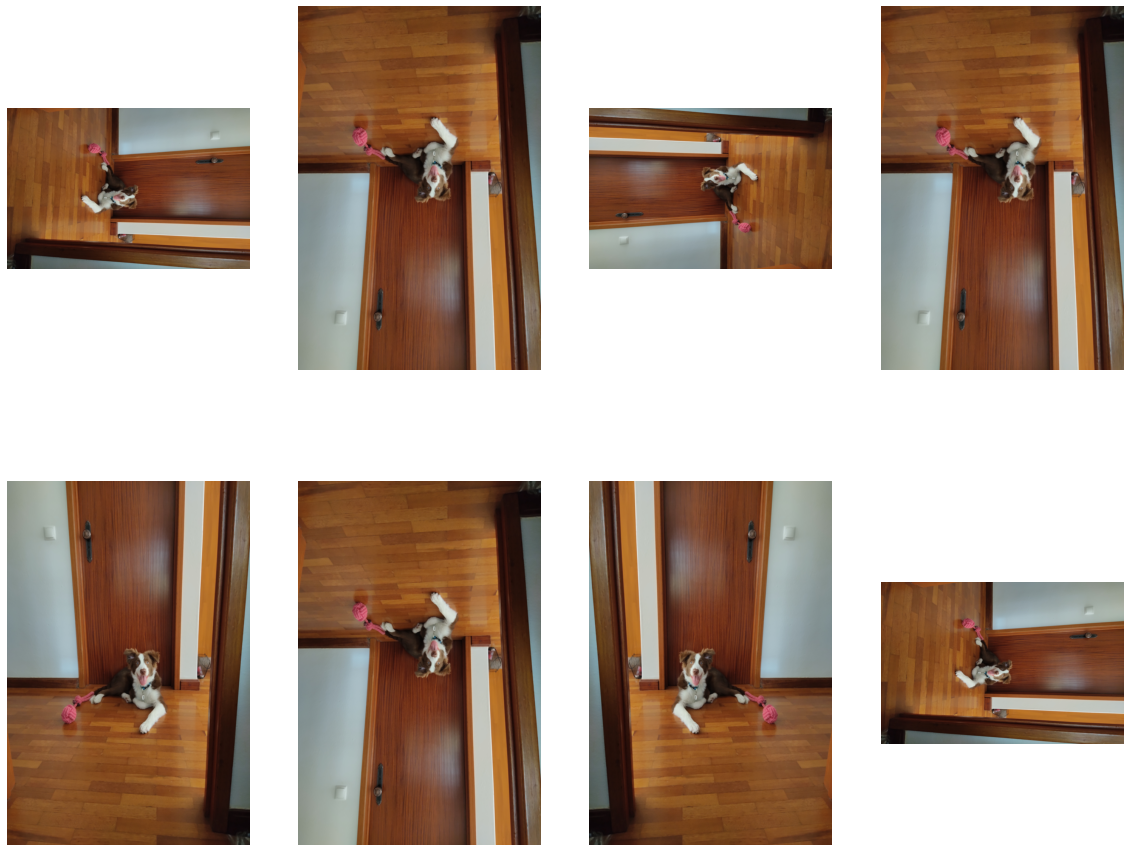

In [39]:
_,axs = subplots(2, 4, figsize=(20,16))
for ax in axs.flatten():
    show_image(DihedralItem(p=1.)(img, split_idx=0), ctx=ax)

### FastAi comes with a extremely usefull class called aug_transforms, this function conviniently wraps up flip, rotate, zoom, warp, lighting transforms.

In [40]:
aug_transforms?

Signature:
aug_transforms(
    mult=1.0,
    do_flip=True,
    flip_vert=False,
    max_rotate=10.0,
    min_zoom=1.0,
    max_zoom=1.1,
    max_lighting=0.2,
    max_warp=0.2,
    p_affine=0.75,
    p_lighting=0.75,
    xtra_tfms=None,
    size=None,
    mode='bilinear',
    pad_mode='reflection',
    align_corners=True,
    batch=False,
    min_scale=1.0,
)
Docstring: Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.
File:      ~/anaconda3/envs/fastai_v2/lib/python3.7/site-packages/fastai/vision/augment.py
Type:      function


In [41]:
timg = TensorImage(array(img)).permute(2,0,1).float()/255.
def _batch_ex(bs): return TensorImage(timg[None].expand(bs, *timg.shape).clone())

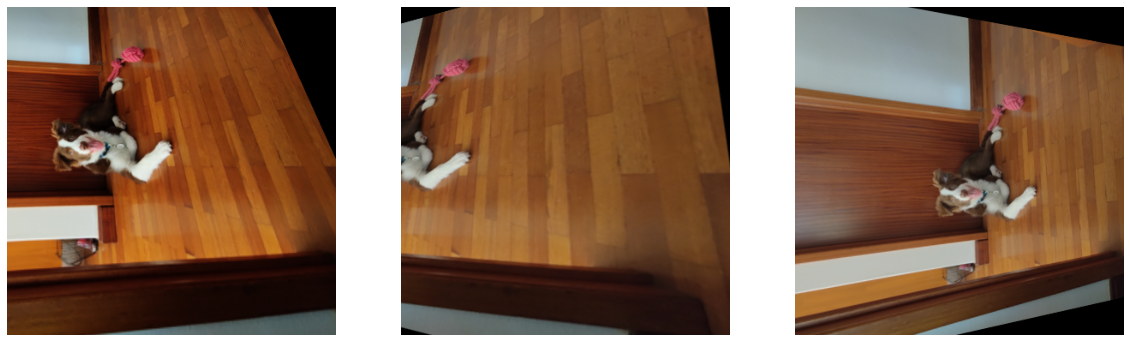

In [42]:
tfms = aug_transforms(pad_mode='zeros', mult=2, min_scale=0.5)
y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(1,3, figsize=(20,8))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

In [43]:
del(data);
gc.collect();
torch.cuda.empty_cache()

### Applying augumentations in our data:

In [44]:
data = ImageDataLoaders.from_folder(path, valid_pct=.2, batch_tfms=[*aug_transforms(size=(128,128)),
                                                                    Normalize.from_stats(*imagenet_stats)])

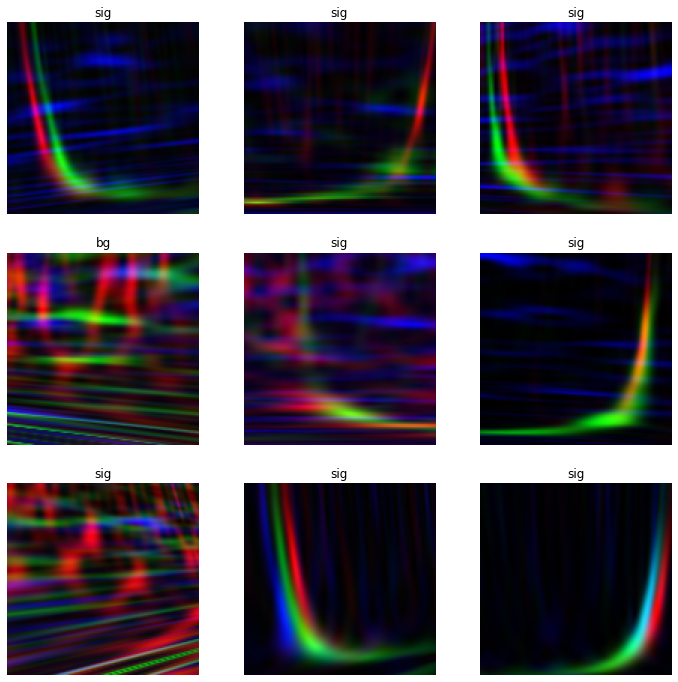

In [46]:
data.show_batch(figsize=(12,12))

In [47]:
b = data.one_batch()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

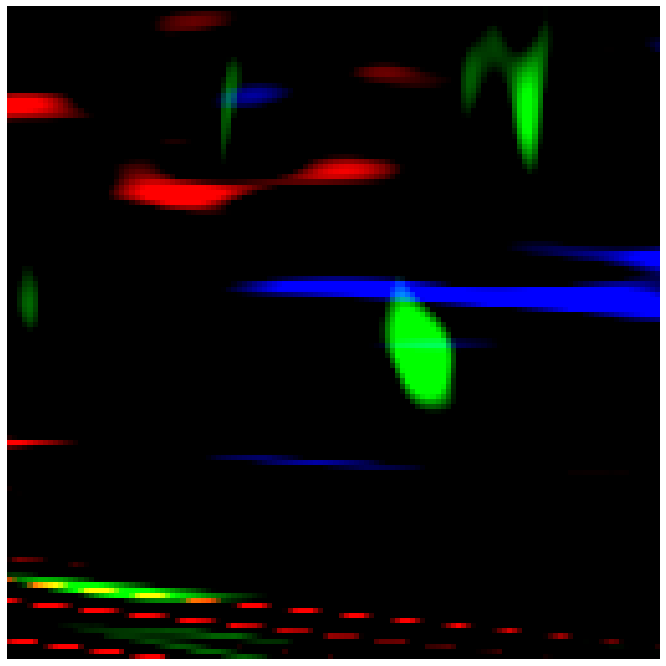

In [48]:
_, axs = subplots(figsize=(12,12))
show_image(b[0][0], ax=axs[0])

In [49]:
b[0][0].shape

torch.Size([3, 128, 128])

In [50]:
data.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'p': 0.5, 'size': (128, 128), 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True} -> Brightness -- {'p': 1.0, 'max_lighting': 0.2} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

### Low and behold, we have our data ready to go!

<img src="./figs/NN_pipeline.png" style="width: 650px;" align="center"/>

### Now that we have the data ready we can concentrate on the model itself. One very good thing from fastai is the possibility of use well established SOTA deep learning models, we are going to leavarage this into our advantage. To do so we can use both the Learner our cnn_learner class.

In [52]:
cnn_learner?

Signature:
cnn_learner(
    dls,
    arch,
    loss_func=None,
    pretrained=True,
    cut=None,
    splitter=None,
    y_range=None,
    config=None,
    n_out=None,
    normalize=True,
    opt_func=<function Adam at 0x7f9ffe6095f0>,
    lr=0.001,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Docstring: Build a convnet style learner from `dls` and `arch`
File:      ~/anaconda3/envs/fastai_v2/lib/python3.7/site-packages/fastai/vision/learner.py
Type:      function


### lets grab a resnet34 to test

In [53]:
resnet34?

Signature: resnet34(pretrained=False, progress=True, **kwargs)
Docstring:
ResNet-34 model from
`"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

Args:
    pretrained (bool): If True, returns a model pre-trained on ImageNet
    progress (bool): If True, displays a progress bar of the download to stderr
File:      ~/anaconda3/envs/fastai_v2/lib/python3.7/site-packages/torchvision/models/resnet.py
Type:      function


# What is a ResNET?

### A residual neural network (ResNet) is an artificial neural network (ANN) of a kind that builds on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers.

In [54]:
learner = cnn_learner(data,resnet34,metrics=[accuracy,error_rate])

### and we can check the dimensions and if our model is loading the data correctly:

In [55]:
learner.summary()

Sequential (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 64 x 64    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 64 x 64 x 64 x 64    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 32 x 32    0          False     
________________________________________________________________
Conv2d               64 x 64 x 32 x 32    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 32 x 32    128        True      
________________________________________________________________
ReLU                 64 x 64 x 32 x 32    0          False     
_________________________________________________

In [56]:
learner.loss_func

FlattenedLoss of CrossEntropyLoss()

In [57]:
CrossEntropyLossFlat?

Init signature:
CrossEntropyLossFlat(
    *args,
    axis=-1,
    weight=None,
    ignore_index=-100,
    reduction='mean',
    flatten=True,
    floatify=False,
    is_2d=True,
)
Docstring:      Same as `nn.CrossEntropyLoss`, but flattens input and target.
File:           ~/anaconda3/envs/fastai_v2/lib/python3.7/site-packages/fastai/layers.py
Type:           type
Subclasses:     


In [58]:
nn.CrossEntropyLoss?

Init signature:
nn.CrossEntropyLoss(
    weight: Union[torch.Tensor, NoneType] = None,
    size_average=None,
    ignore_index: int = -100,
    reduce=None,
    reduction: str = 'mean',
) -> None
Docstring:     
This criterion combines :func:`nn.LogSoftmax` and :func:`nn.NLLLoss` in one single class.

It is useful when training a classification problem with `C` classes.
If provided, the optional argument :attr:`weight` should be a 1D `Tensor`
assigning weight to each of the classes.
This is particularly useful when you have an unbalanced training set.

The `input` is expected to contain raw, unnormalized scores for each class.

`input` has to be a Tensor of size either :math:`(minibatch, C)` or
:math:`(minibatch, C, d_1, d_2, ..., d_K)`
with :math:`K \geq 1` for the `K`-dimensional case (described later).

This criterion expects a class index in the range :math:`[0, C-1]` as the
`target` for each value of a 1D tensor of size `minibatch`; if `ignore_index`
is specified, this criterion a

$\text{loss}(x, class) = -\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right)
                   = -x[class] + \log\left(\sum_j \exp(x[j])\right)$
                   
- Encodes negation of logarithm of probability of entirely correct classification.
- Equivalent to multinomial logistic regression model.
- Numerically stable combination

### for now we are working on a pre-trained model, so you have most of the "trainable" parameters set to False, so we are using transfer learning by default.

### Now we have our model and data ready to go, we just need to start the training loop. The training lop can be initiate by the function fit or fit_onecicle. But before we run into, we should at least try to find a good learning rate for our model.

<img src="./figs/image1.gif" style="width: 650px;" align="center"/>

### Just remember:

<font size="5">\begin{eqnarray} 
  w_k & \rightarrow & w_k' = w_k-\frac{\eta}{n}
  \sum_j \frac{\partial C_{X_j}}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\frac{\eta}{n}
  \sum_j \frac{\partial C_{X_j}}{\partial b_l},
\end{eqnarray}
    
<font size="5"> The learning rate $\eta$ decides the size of the SGD step.
    
<font size="5"> The batch size $n$ will tell how well our mini-batch represents the full dataset.    

### "Well beginning is half done." We can use the function lr_find to find the best learning rate to start:

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=4.786300905834651e-06)

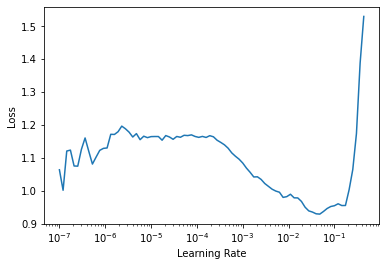

In [59]:
learner.lr_find()

### following the guidelines from https://arxiv.org/abs/1803.09820 , we select a learning rate whe we have a most steeper region.

In [60]:
learner.fit_one_cycle(7,lr_max=1e-3)

### What happened to the learning rate?

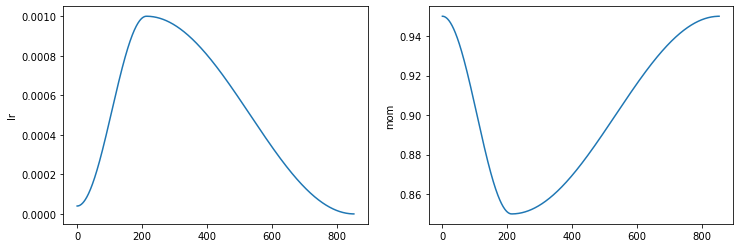

In [61]:
learner.recorder.plot_sched()

### We can see that the learning rate is danamyc changing and reach to a maximum laue while the momentum is decreasing.

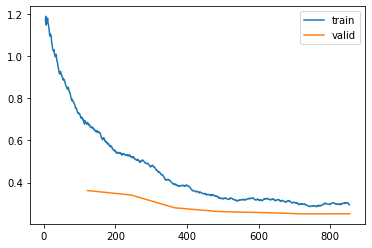

In [62]:
learner.recorder.plot_loss()

and we can check the results:

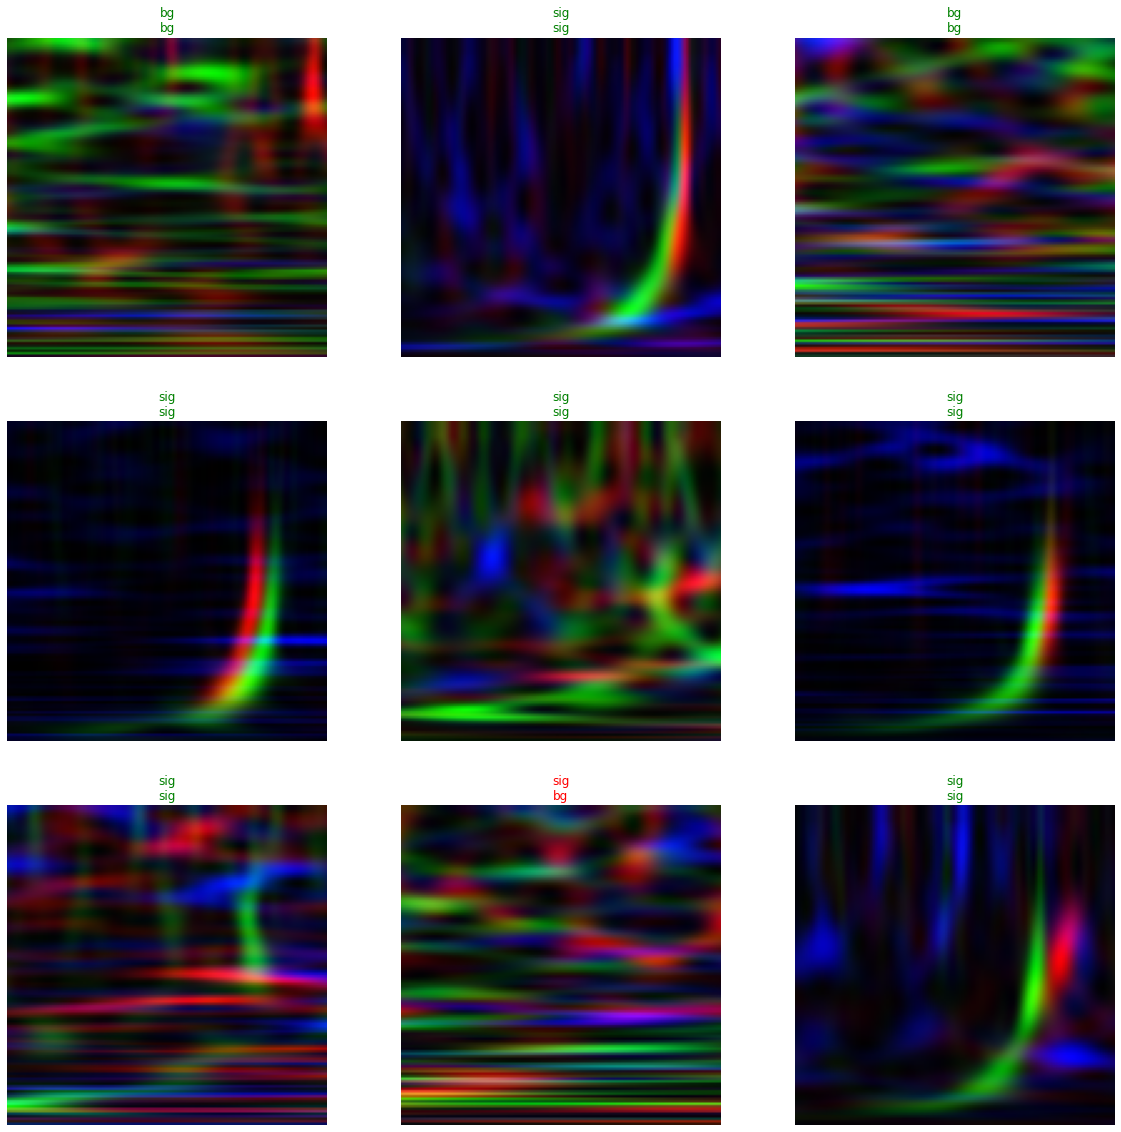

In [63]:
learner.show_results(figsize=(20,20))

### and see where we failed:

In [64]:
interp = Interpretation.from_learner(learner)

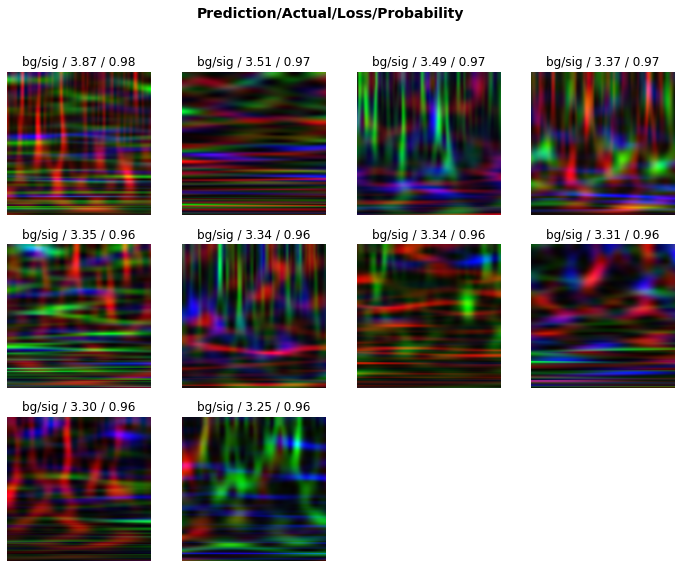

In [65]:
interp.plot_top_losses(10)

# Can we do better? 
<img src="./figs/gg.jpeg" style="width: 550px;" align="center"/>

### first we can unfreeze the model:

In [66]:
learner.unfreeze()

### find a new learning rate

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.2022644114040304e-05)

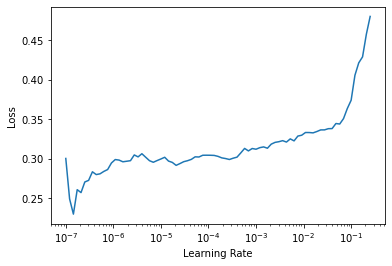

In [68]:
learner.lr_find()

In [69]:
learner.fit_one_cycle(7,lr_max=1.20e-5)

In [70]:
interp = Interpretation.from_learner(learner)

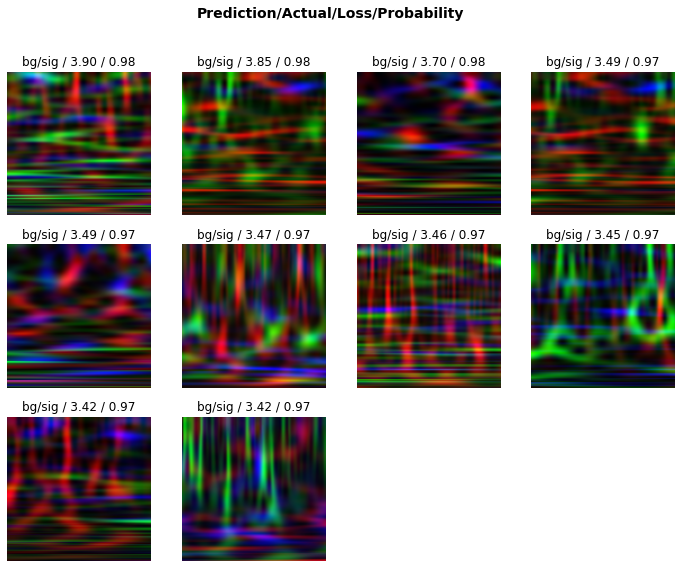

In [71]:
interp.plot_top_losses(10)

In [72]:
learner.save('first_model')

Path('data for classification/models/first_model.pth')

we can test on some real data:

In [73]:
path_real_data = Path('real_signals/')

In [74]:
real_files = get_image_files(path_real_data)

In [75]:
real_files

(#28) [Path('real_signals/GW151226_R1.png'),Path('real_signals/GW190425_R1.png'),Path('real_signals/GW151012_R1.png'),Path('real_signals/MC170412_R1.png'),Path('real_signals/MC170616_R1.png'),Path('real_signals/GW190814_R1.png'),Path('real_signals/MC170219_R1.png'),Path('real_signals/GW170818_R1.png'),Path('real_signals/MC170720_R1.png'),Path('real_signals/MC151008_R1.png')...]

In [76]:
learner.predict(real_files[0])

('sig', tensor(1), tensor([0.1509, 0.8491]))

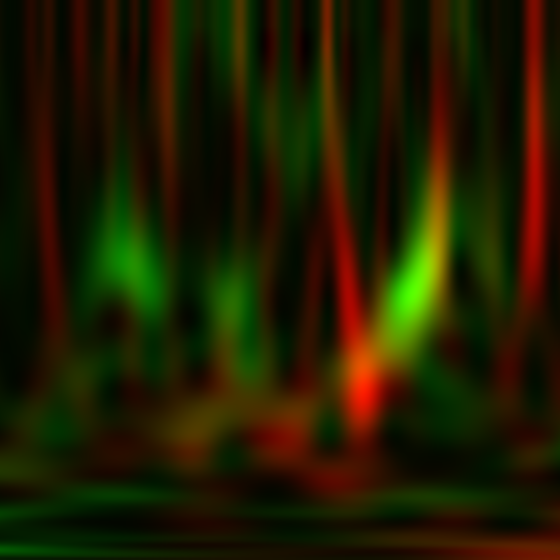

In [77]:
PILImage(PILImage.create(real_files[0]))

In [78]:
for i in real_files:
    pred, _, probs = learner.predict(i)
    print(f'{i.name}: class predicted {pred}, with probability {probs}')

GW151226_R1.png: class predicted sig, with probability tensor([0.1509, 0.8491])


GW190425_R1.png: class predicted sig, with probability tensor([0.0343, 0.9657])


GW151012_R1.png: class predicted sig, with probability tensor([6.4891e-04, 9.9935e-01])


MC170412_R1.png: class predicted bg, with probability tensor([0.9331, 0.0669])


MC170616_R1.png: class predicted bg, with probability tensor([0.9457, 0.0543])


GW190814_R1.png: class predicted sig, with probability tensor([0.3982, 0.6018])


MC170219_R1.png: class predicted bg, with probability tensor([0.5198, 0.4802])


GW170818_R1.png: class predicted sig, with probability tensor([0.0226, 0.9774])


MC170720_R1.png: class predicted bg, with probability tensor([0.7490, 0.2510])


MC151008_R1.png: class predicted bg, with probability tensor([0.7441, 0.2559])


MC170630_R1.png: class predicted bg, with probability tensor([0.5629, 0.4371])


GW170817_R1.png: class predicted sig, with probability tensor([0.0823, 0.9177])


MC161202_R1.png: class predicted bg, with probability tensor([0.8131, 0.1869])


GW170729_R1.png: class predicted sig, with probability tensor([0.0045, 0.9955])


MC170705_R1.png: class predicted bg, with probability tensor([0.8280, 0.1720])


GW170814_R1.png: class predicted sig, with probability tensor([0.0032, 0.9968])


GW190412_R2.png: class predicted sig, with probability tensor([0.0020, 0.9980])


MC170208_R1.png: class predicted bg, with probability tensor([0.7733, 0.2267])


MC170405_R1.png: class predicted bg, with probability tensor([0.9155, 0.0845])


GW170104_R1.png: class predicted sig, with probability tensor([0.0036, 0.9964])


MC161217_R1.png: class predicted bg, with probability tensor([0.7123, 0.2877])


GW170608_R1.png: class predicted sig, with probability tensor([0.0135, 0.9865])


MC151116_R1.png: class predicted bg, with probability tensor([0.6774, 0.3226])


MC151012A_R1.png: class predicted sig, with probability tensor([0.3166, 0.6834])


GW170823_R1.png: class predicted sig, with probability tensor([7.1851e-04, 9.9928e-01])


MC170423_R1.png: class predicted sig, with probability tensor([0.3218, 0.6782])


GW150914_R1.png: class predicted sig, with probability tensor([0.0091, 0.9909])


GW170809_R1.png: class predicted sig, with probability tensor([0.0029, 0.9971])


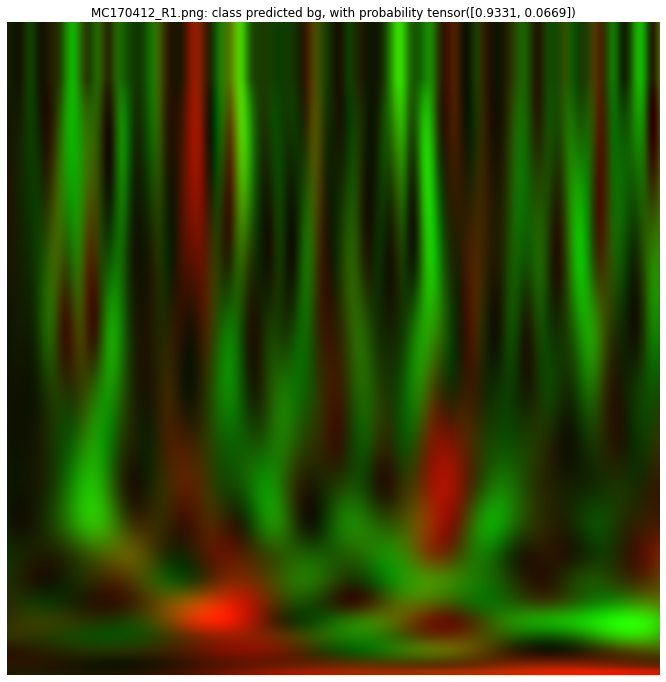

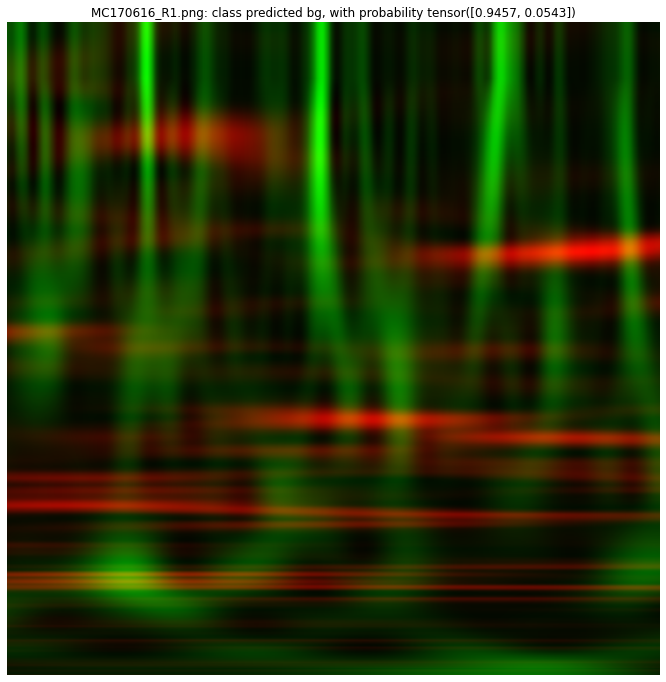

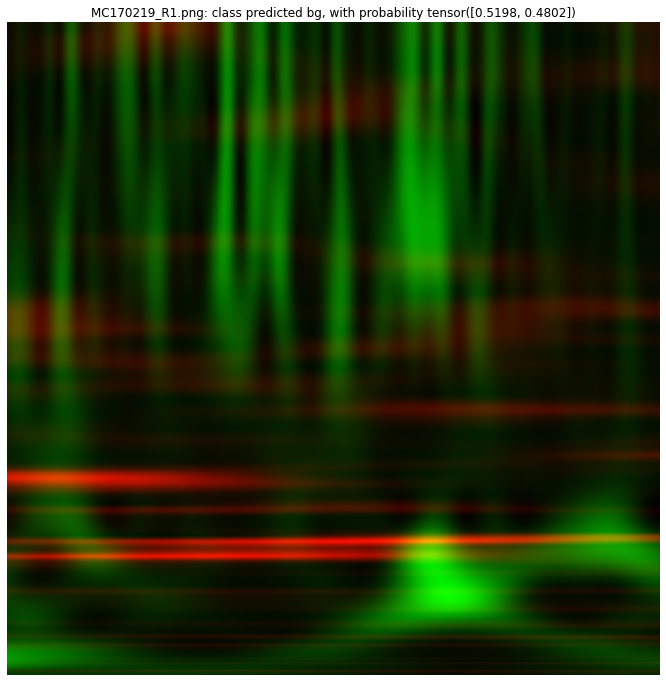

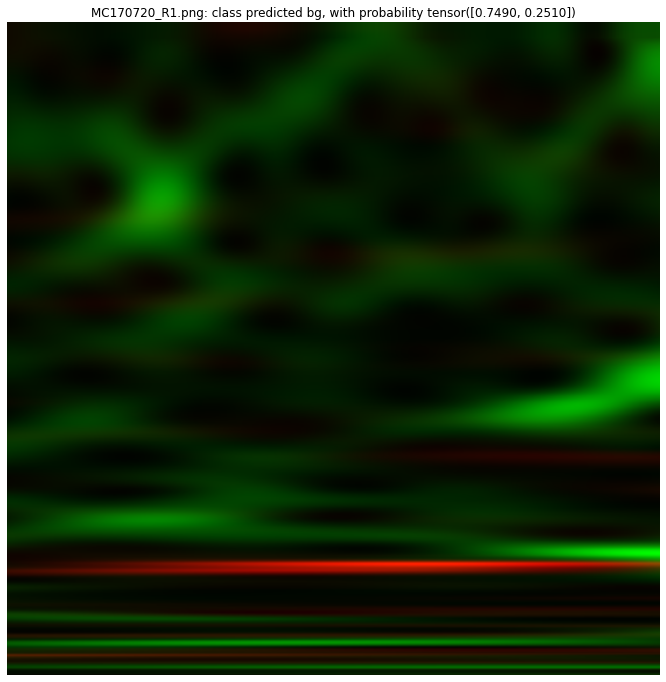

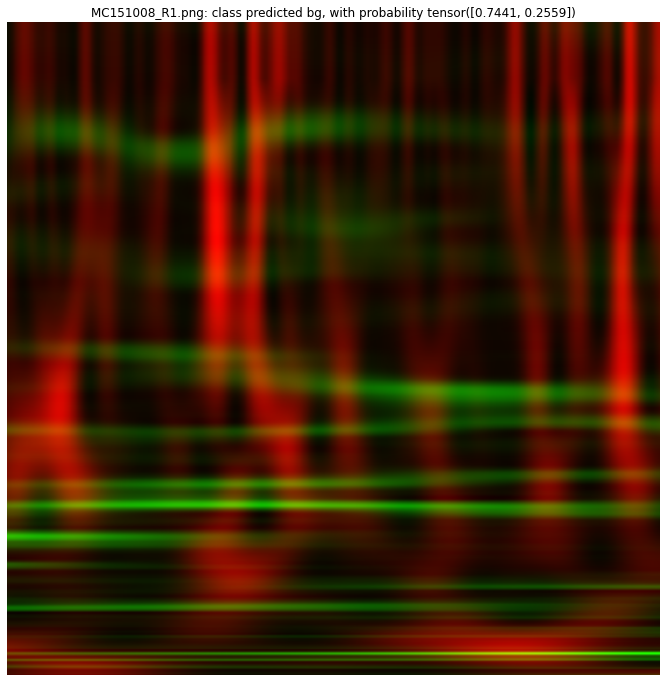

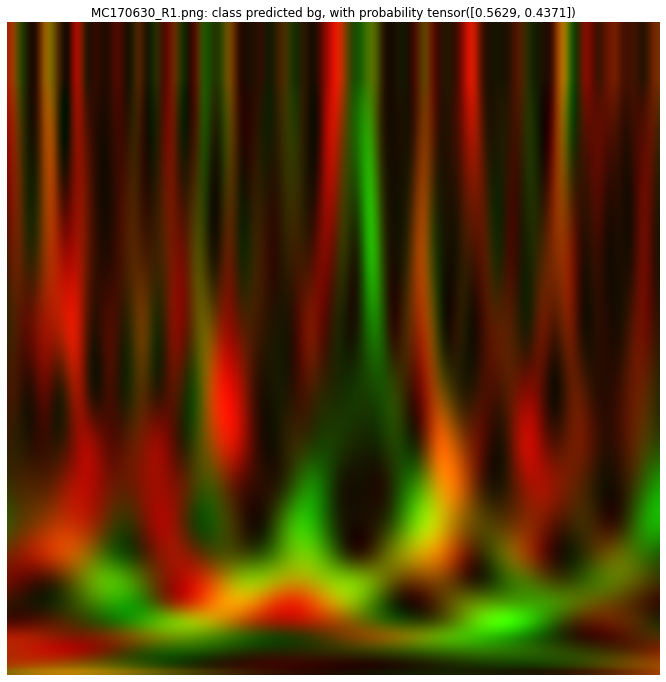

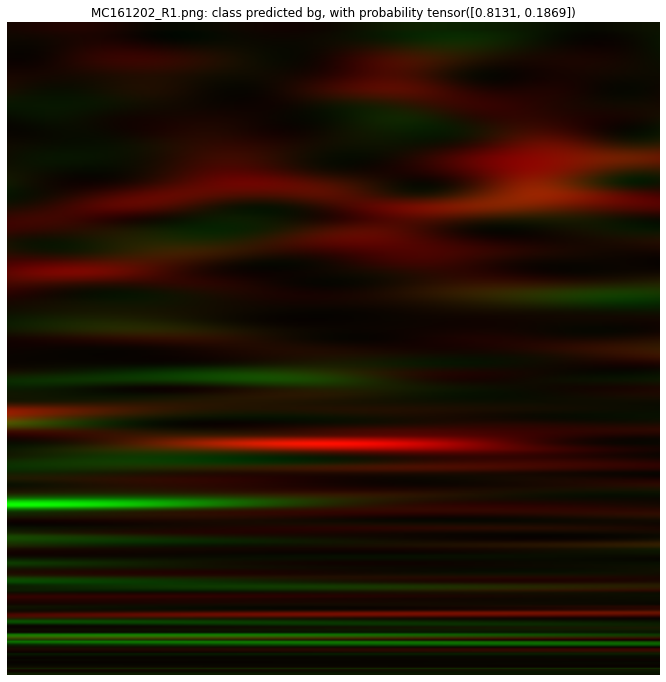

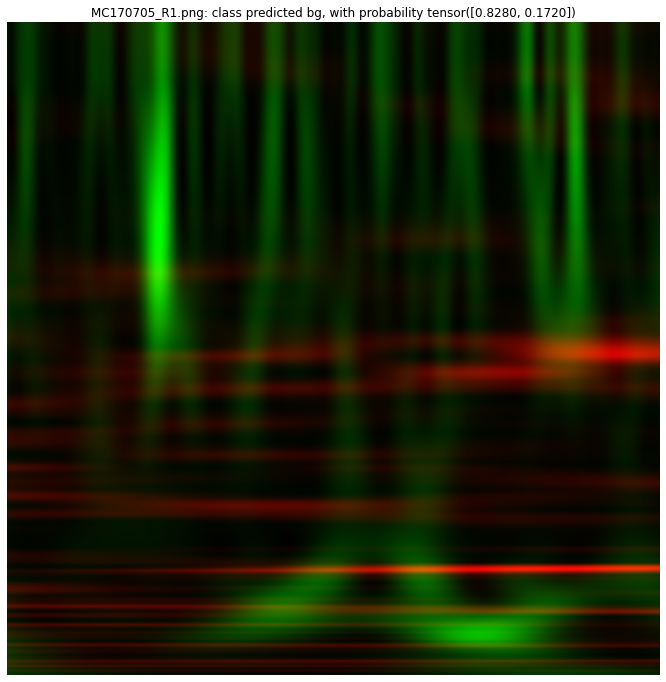

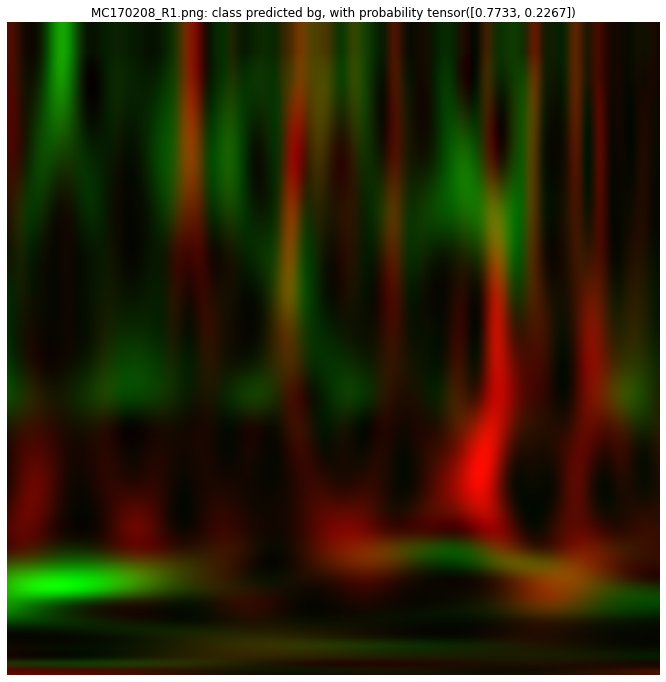

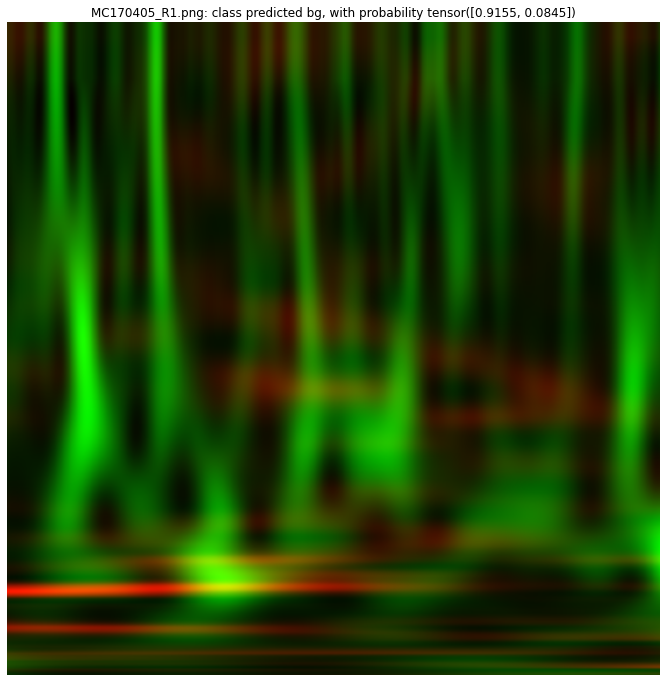

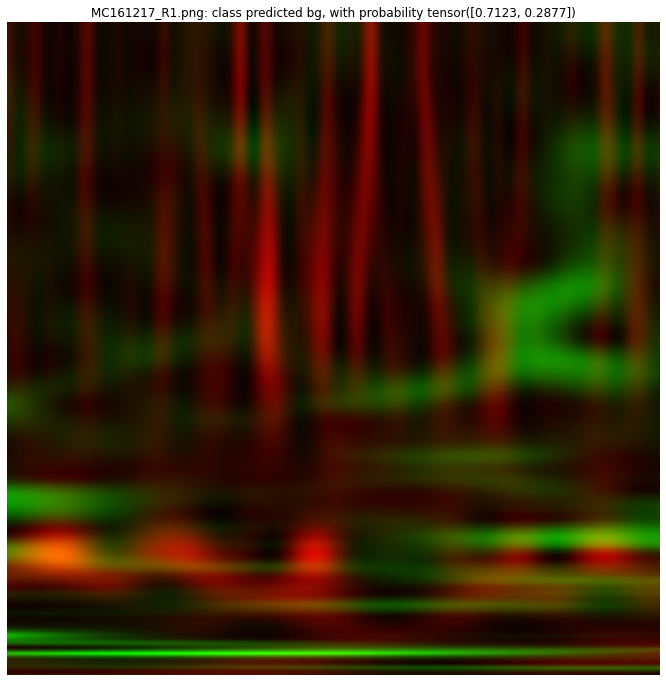

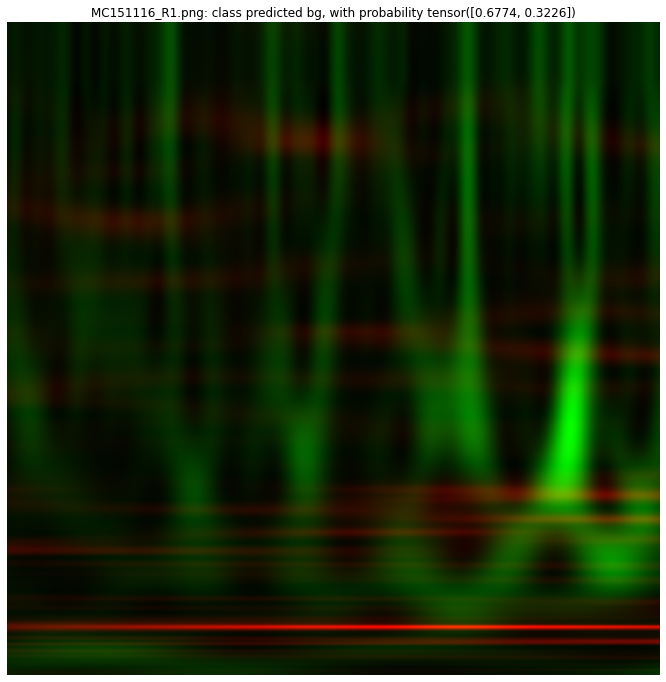

In [79]:
for i in real_files:
    pred, _, probs = learner.predict(i)
    if pred == 'bg':
        _,axs = subplots(1,1, figsize=(12,12))
        img = PILImage(PILImage.create(i))
        show_image(img,ctx=axs[0], title=f'{i.name}: class predicted {pred}, with probability {probs}')